**dataset** source: https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge/code

# **Import Libraries**

In [ ]:
# Step 1: Import relevant libraries---------------------------------------------------------

#Standard libraries for data analysis:----------------------

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm


# sklearn modules for data preprocessing-------------------------------------

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


#sklearn modules for Model Selection--------------------------------------

from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#sklearn modules for Model Evaluation & Improvement---------------------------

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, ShuffleSplit


from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score


#Standard libraries for data visualization---------------------

import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sns.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve


#Miscellaneous Utilitiy Libraries--------------------------------------

import random
import os
import re
import sys
import timeit
import string
import time
import pickle
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib
import warnings
warnings.filterwarnings('ignore')

# **Import Dataset**

In [ ]:
# import data from google drive

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df = pd.read_csv("/content/drive/My Drive/Course/Data Science/Project/Project 3 - Car Price Prediction/car_price_prediction.csv")
df.head(3)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2


# **Evaluate Data Structure**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [ ]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [ ]:
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [ ]:
df[df['Manufacturer'] == 'TOYOTA']

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
6,45656768,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4.0,Automatic,Front,04-May,Left wheel,White,12
8,45641395,1098,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
15,45465200,549,1079,TOYOTA,CHR,2018,Jeep,Yes,Petrol,2,74146 km,4.0,Automatic,Front,04-May,Left wheel,White,12
21,45168471,20698,586,TOYOTA,Prius,2012,Sedan,Yes,Plug-in Hybrid,1.8,187000 km,4.0,Automatic,Front,04-May,Left wheel,White,12
22,45751951,17562,1249,TOYOTA,Camry,2017,Sedan,Yes,Petrol,2.5,39709 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,45812999,1176,986,TOYOTA,Camry,2010,Sedan,Yes,Hybrid,2.4,129170 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
19216,45784464,37633,1249,TOYOTA,RAV 4,2017,Jeep,Yes,Petrol,2.5,23430 km,4.0,Tiptronic,Front,04-May,Left wheel,Beige,12
19219,45789241,19444,-,TOYOTA,Prius,2013,Sedan,No,Hybrid,1.8,140607 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
19229,39977395,50,-,TOYOTA,Prius,2008,Hatchback,No,Hybrid,1.5,150000 km,4.0,Automatic,Front,04-May,Left wheel,Silver,6


# **Clean the Dataset**

In [ ]:
# check duplicate data

df.duplicated().sum()

313

There is 313 duplicate data in dataset

In [ ]:
# remove all duplicate

df = df.drop_duplicates()

In [ ]:
# check total null data for each column

total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count() * 100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
ID,0,0.0
Price,0,0.0
Color,0,0.0
Wheel,0,0.0
Doors,0,0.0
Drive wheels,0,0.0
Gear box type,0,0.0
Cylinders,0,0.0
Mileage,0,0.0
Engine volume,0,0.0


There is no null data

## Unique values in each categorical variable:

### Categorical Feature

In [ ]:
columns = df.select_dtypes(include=['object'])
columns.columns

Index(['Levy', 'Manufacturer', 'Model', 'Category', 'Leather interior',
       'Fuel type', 'Engine volume', 'Mileage', 'Gear box type',
       'Drive wheels', 'Doors', 'Wheel', 'Color'],
      dtype='object')

In [ ]:
# print all the value for each categorical feature to detect an anomali

for column in columns:
  print(f'----------------{column}------------------')
  print(df[column].unique())
  print()

----------------Levy------------------
['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598' '1514' '1058' '738' '1935' '481' '1522' '1282' '456' '880' '900'
 '798' '1277' '442' '1051' '790' '1292' '1047' '528' '1211' '1493' '1793'
 '574' '930' '1998' '271' '706' '1481' '1677' '1661' '1286' '1408' '1090'
 '595' '1451' '1267' '993' '1714' '878' '641' '749' '1511' '603' '353'
 '877' '1236' '1

From the above results, we can conclude the following steps need to be taken regarding the data:

1. The Levy column needs to be converted to float or integer type for further processing.
2. The Engine volume and Mileage columns need to be cleaned by removing the strings 'turbo' and 'km', and then converted to float or integer data type.
3. The Doors column should be dropped because its contents are unclear and do not match the column name, providing no useful information for analysis.








In [ ]:
# fill the '-' with NaN

df['Levy'] = df['Levy'].replace('-', np.nan)

In [ ]:
# change the type of Levy from object or string to float

df['Levy'] = df['Levy'].apply(lambda x: float(x) if x != None else x)

In [ ]:
# use the float type of Levy to fill the NaN with mean of the data

mean_levy = df['Levy'][df['Levy'] != None].mean()
df['Levy'] = df['Levy'].fillna(mean_levy)

In [ ]:
# cleat the data inside 'Engine Volume' column

df['Engine volume'] = df['Engine volume'].apply(lambda x: x.replace(' Turbo', '')).astype(float)

In [ ]:
# cleat the data inside 'Engine Volume' column

df['Mileage'] = df['Mileage'].apply(lambda x: x.replace(' km', '')).astype(int)

In [ ]:
# drop 'Doors' column

df.drop(columns='Doors', inplace=True)

### Numerical Feature

In [ ]:
num_columns = df.select_dtypes(include=['float', 'int'])

In [ ]:
# print all the value for each numerical feature to detect an anomali

for column in num_columns:
  print(f'----------------{column}------------------')
  print(df[column].unique())
  print()

----------------ID------------------
[45654403 44731507 45774419 ... 45804997 45793526 45813273]

----------------Price------------------
[13328 16621  8467 ... 56814 63886 22075]

----------------Levy------------------
[ 1399.          1018.           906.29920545   862.
   446.           891.           761.           751.
   394.          1053.          1055.          1079.
   810.          2386.          1850.           531.
   586.          1249.          2455.           583.
  1537.          1288.           915.          1750.
   707.          1077.          1486.          1091.
   650.           382.          1436.          1194.
   503.          1017.          1104.           639.
   629.           919.           781.           530.
   640.           765.           777.           779.
   934.           769.           645.          1185.
  1324.           830.          1187.          1111.
   760.           642.          1604.          1095.
   966.           473.          1138. 

In [ ]:
df['Cylinders'] = df['Cylinders'].apply(lambda x: int(x))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  float64
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  float64
 10  Mileage           18924 non-null  int64  
 11  Cylinders         18924 non-null  int64  
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Wheel             18924 non-null  object 
 15  Color             18924 non-null  object 
 16  Airbags           18924 non-null  int64  
dty

## Removing Outliers

In [ ]:
import pandas as pd

# calculate the value of Q1, Q3, and IQR
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# detemine the upper and lower threshold for outlier
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# remove outlier
df = df[(df['Price'] > lower_bound) & (df['Price'] < upper_bound)]


## Save Data Unique For App

In [ ]:
# get the unique value for some column in dataset
data_unique = {}
columns_to_save = df.drop(columns='Price').columns

for column in columns_to_save:
    data_unique[column] = df[column].unique()

# save the unique value inside the pickle file
with open('unique_values.pkl', 'wb') as f:
    pickle.dump(data_unique, f)

# **Explatory Data Analysis**

In [ ]:
# Mathing the manufacturer of the car with the model

manufacturer_models = {}

for manufacturer in df['Manufacturer'].unique():
    models = df['Model'][df['Manufacturer'] == manufacturer].unique()
    manufacturer_models[manufacturer] = models

# save the directory
with open('manufacturer_models.pkl', 'wb') as f:
    pickle.dump(manufacturer_models, f)

## Numerical Feature

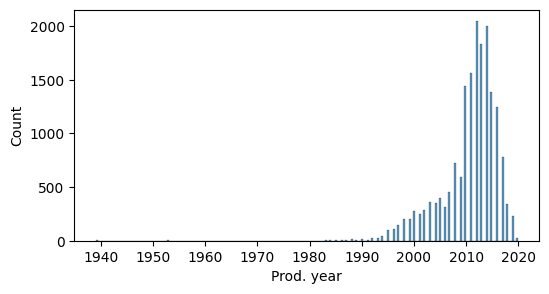

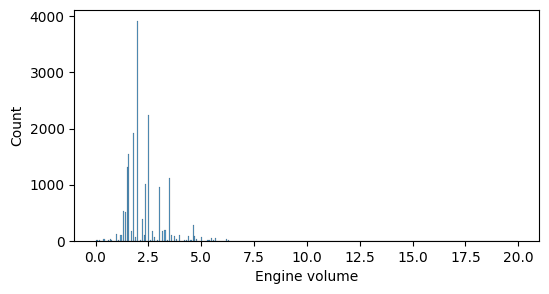

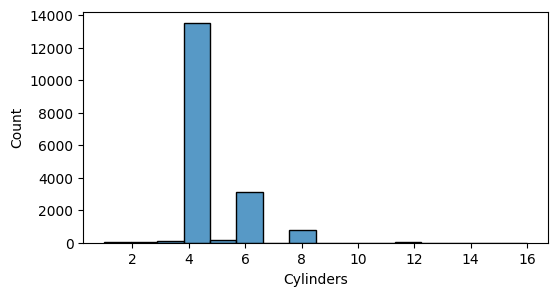

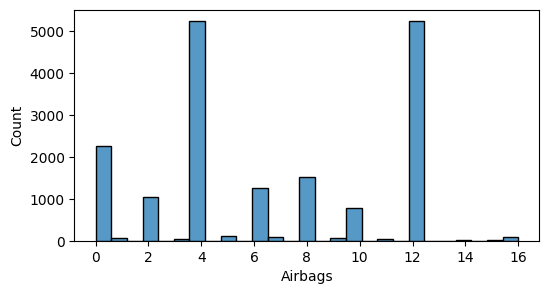

In [ ]:
# plot the distribution

num_col = ('Prod. year', 'Engine volume', 'Cylinders',
       'Airbags')

for col in num_col:
  plt.figure(figsize=(6,3))
  sns.histplot(data=df, x=col)
  # plt.savefig(numerical+'.png')

### Price Distribution

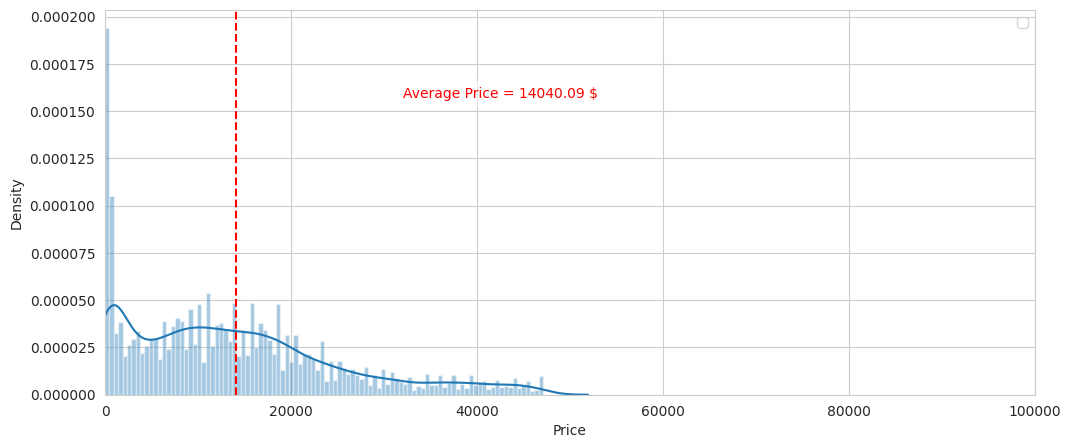

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 5))

sns.distplot(df['Price'], kde=True, bins=100)  # car price distribution

plt.axvline(df['Price'].mean(), c='red', linestyle='dashed')  # create dash line that shows average price for car

plt.text(0.53, 0.8, f'Average Price = {df.Price.mean():.2f} $', transform=plt.gca().transAxes, color='red', fontsize=10,
         verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))
plt.xlim(0, 100000)  # setting x-axis limit
plt.legend()
plt.show()


From the data above, we can see that there are outliers both at the upper and lower ends, so we need to remove them because they will affect the results of the machine learning model later. Let's perform data cleaning in the Clean the Dataset section.

Note: Before generating the current graph, the graph showed outliers around $2x10^7 dollar . That's why I provided information in paragraph 1 about removing outliers.

## Categorical Feature

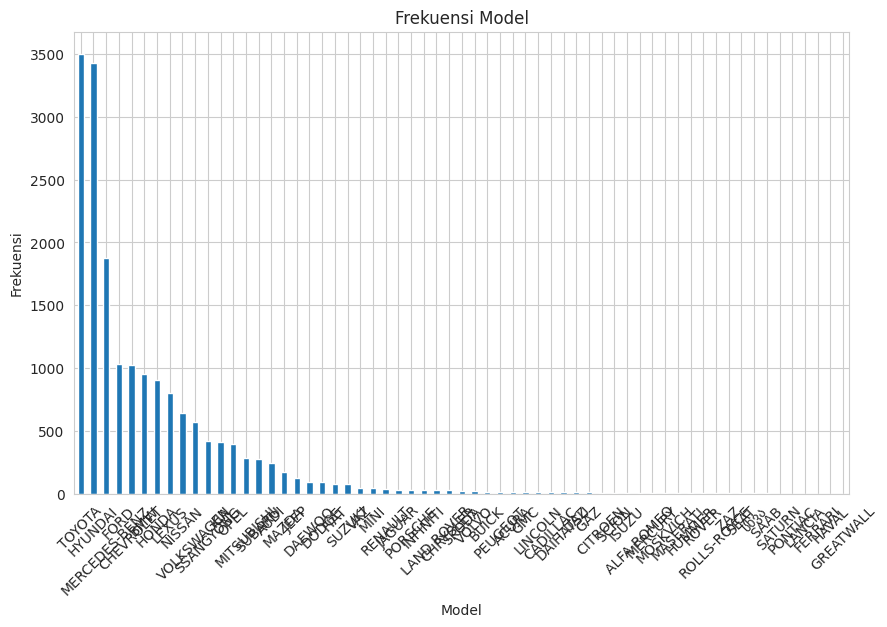

In [ ]:
model_freq = df['Manufacturer'].value_counts()
plt.figure(figsize=(10, 6))
model_freq.plot(kind='bar')
plt.title('Frekuensi Model')
plt.xlabel('Model')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)  # Untuk memutar label sumbu x agar lebih mudah dibaca
plt.show()


In [ ]:
# create a table to see the price of the car model

model_prices = df.groupby('Model')['Price'].mean().reset_index().sort_values(by='Price', ascending=False).head(10)
model_prices

,Model,Price
754,GS 450,47042.0
1144,Quest 2016,47042.0
1295,Sprinter 316 CDI,47042.0
165,540 I,47042.0
804,Highlander XLE,47042.0
1284,Sportage PRESTIGE,47038.0
335,C 63 AMG,46728.0
594,ES 300 hybrid,46728.0
1152,RAV 4 Dizel,46414.0
1495,macan,46414.0


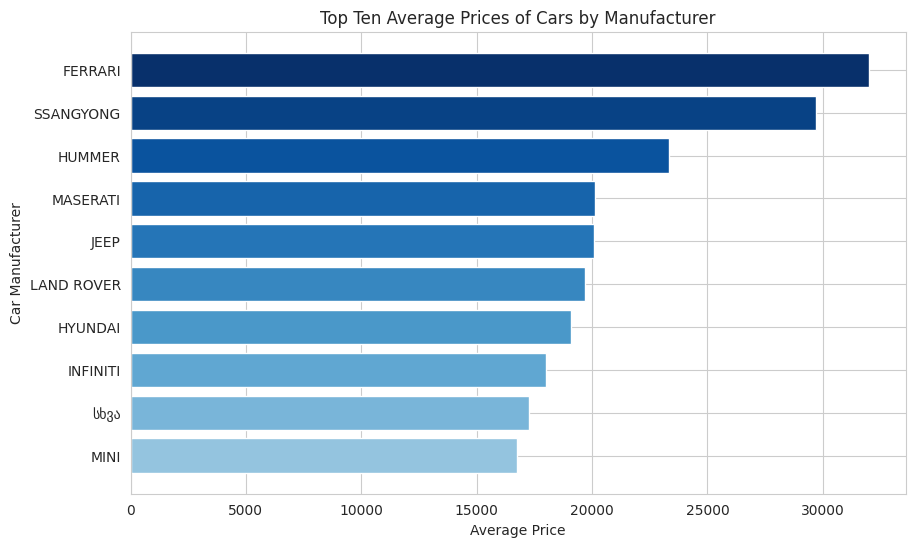

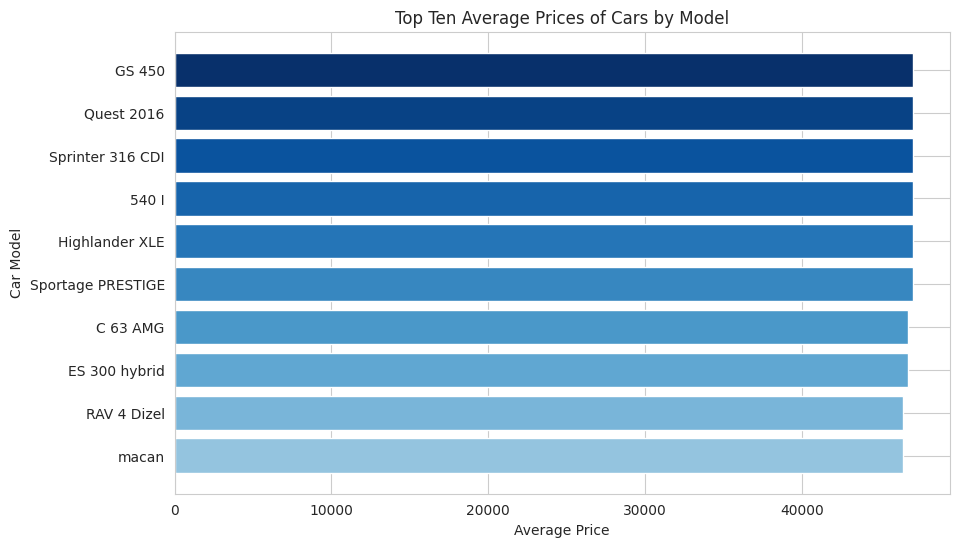

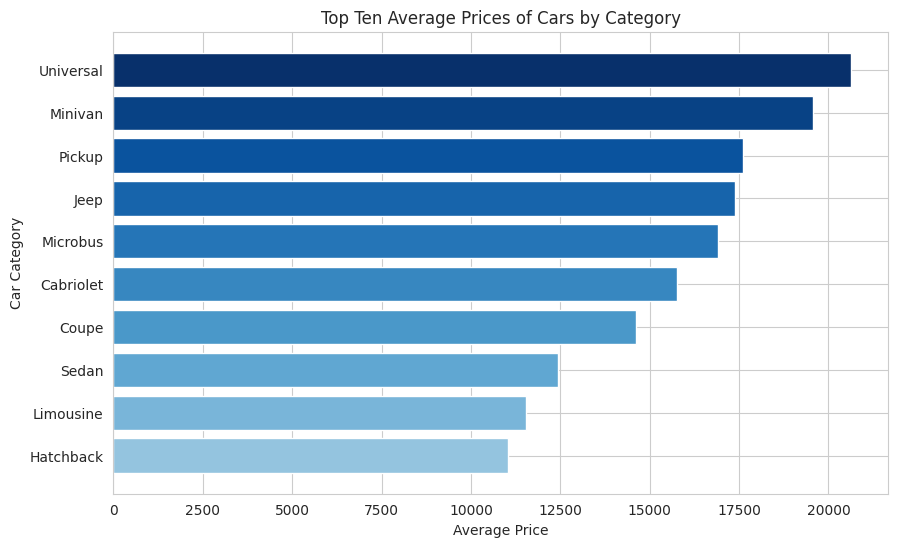

In [ ]:
# plotting the ten highest price of the car for each feature

columns = ('Manufacturer', 'Model', 'Category')
for col in columns:
  cat_prices = df.groupby(col)['Price'].mean().reset_index().sort_values(by='Price', ascending=False).head(10)

  plt.figure(figsize=(10, 6))
  plt.barh(cat_prices[col], cat_prices['Price'],
        color=plt.cm.Blues(np.linspace(1, 0.4, len(cat_prices[col]))))

  plt.title(f'Top Ten Average Prices of Cars by {col}')
  plt.xlabel('Average Price')
  plt.ylabel(f'Car {col}')
  plt.gca().invert_yaxis()
  plt.show()


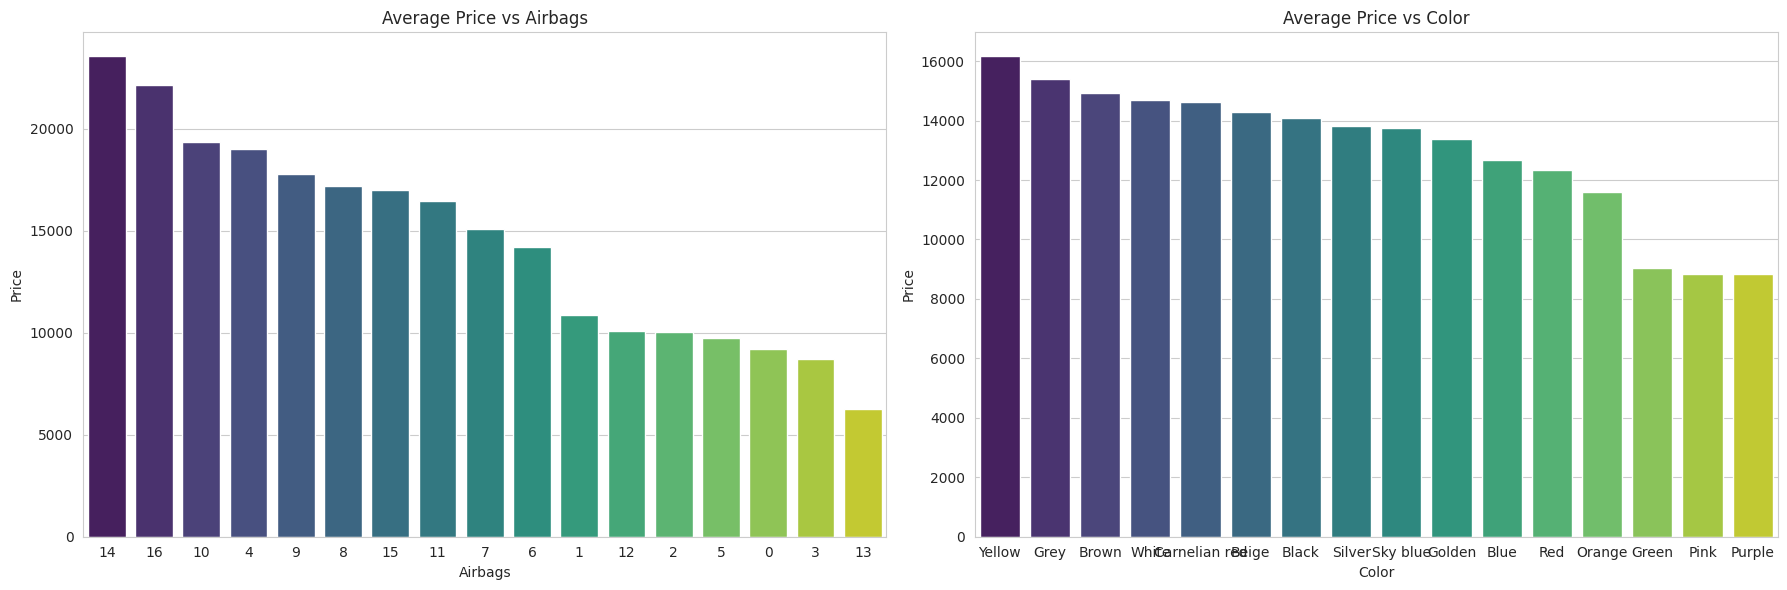

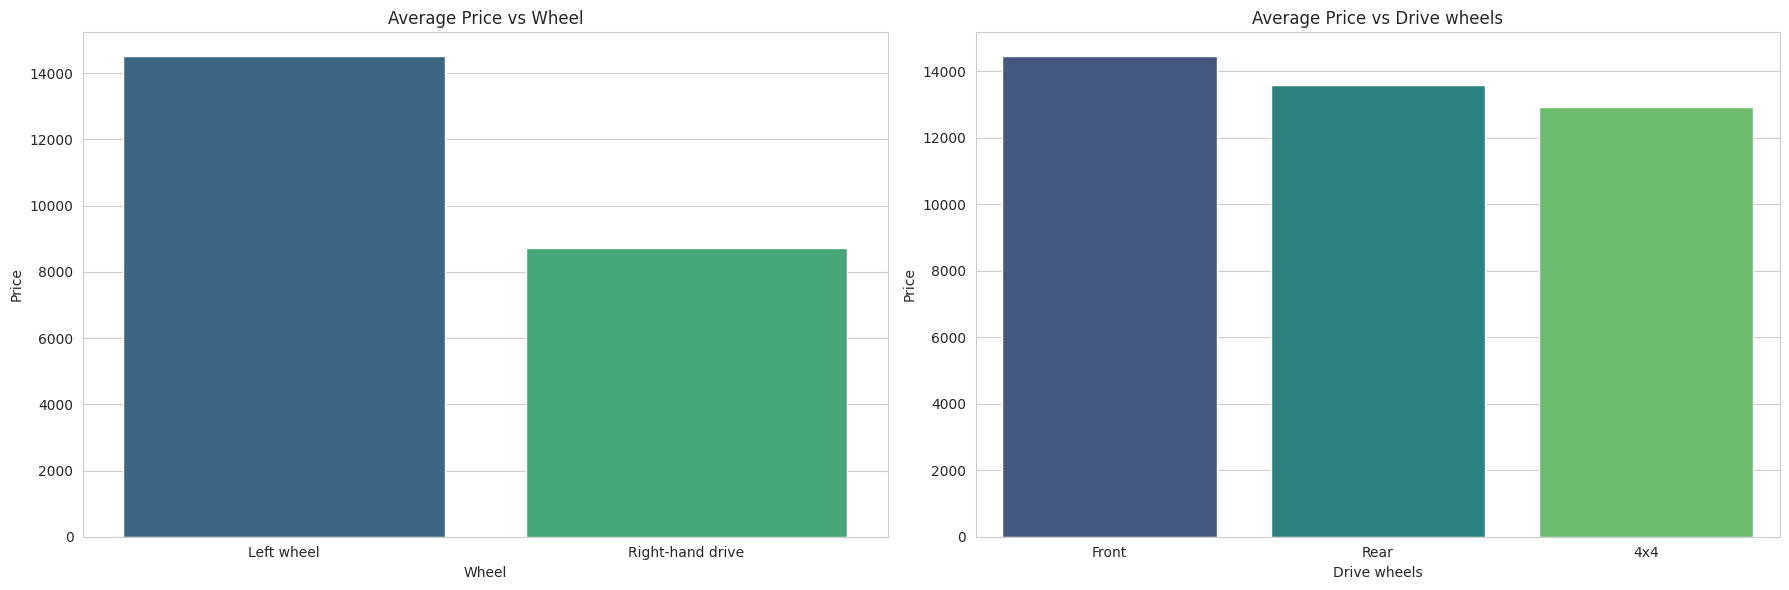

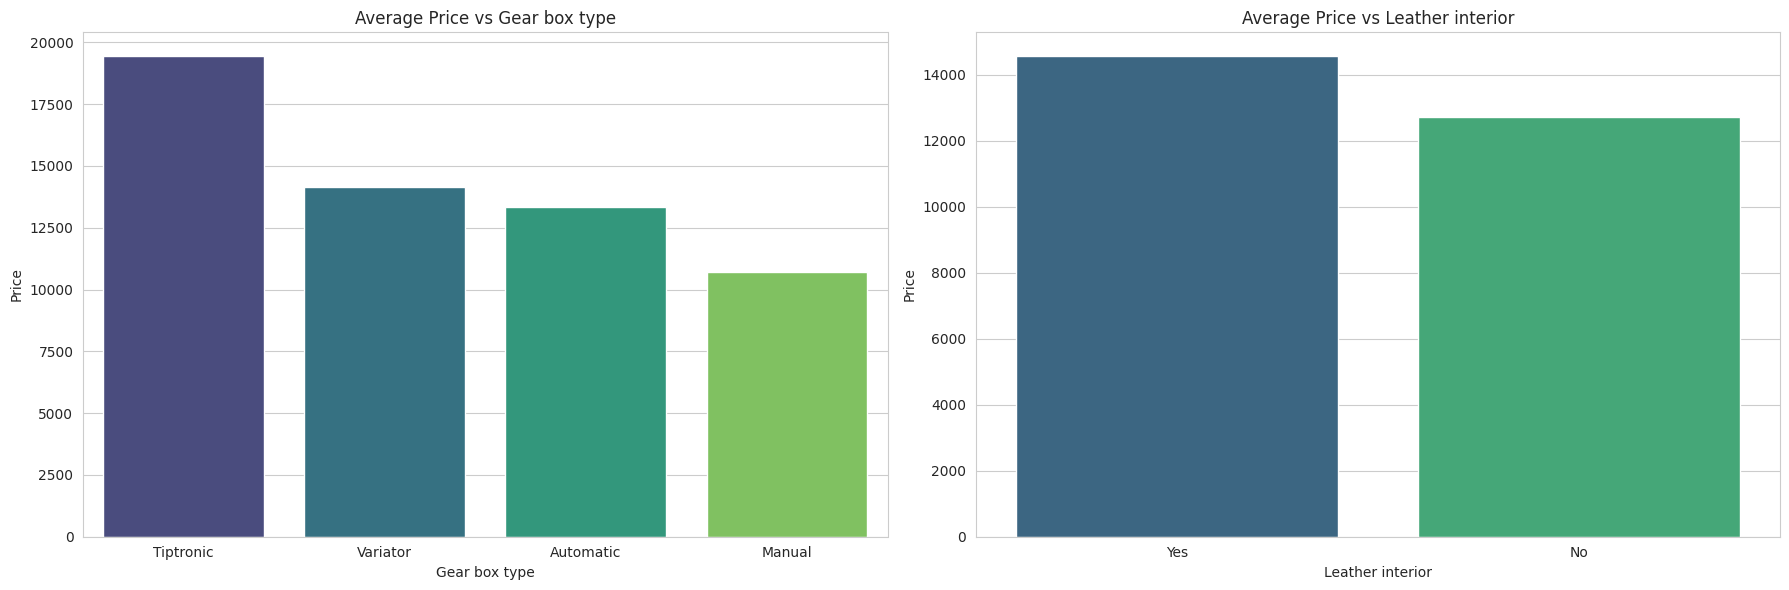

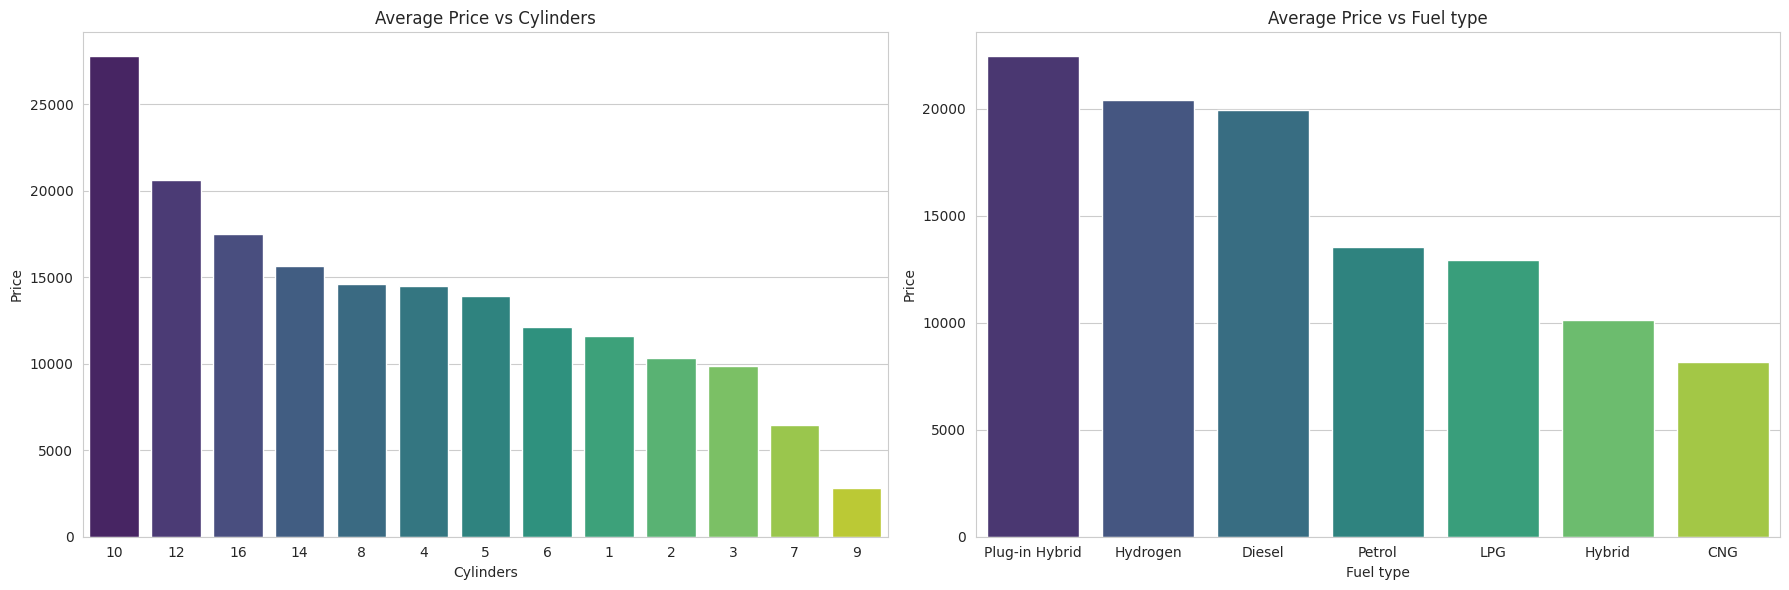

In [ ]:
# List of columns to plot
columns_to_plot = [['Airbags', 'Color'], ['Wheel', 'Drive wheels'], ['Gear box type', 'Leather interior'], ['Cylinders', 'Fuel type']]

# Iterate over the columns and create bar plots
for i in columns_to_plot:
  # Create a 5x2 subplot grid
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

  # Flatten the axes for easier iteration
  axes = axes.flatten()
  for j, column in enumerate(i):
      # Sort the data by the average price in descending order
      sorted_data = df.groupby(column)['Price'].mean().sort_values(ascending=False).index

      sns.barplot(x=column, y='Price', data=df, order=sorted_data, ax=axes[j], ci=None, palette='viridis')
      axes[j].set_title(f'Average Price vs {column}')

  # Adjust layout
  plt.tight_layout()
  plt.show()


In [ ]:
 df.select_dtypes(include=['object']).columns

Index(['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type',
       'Gear box type', 'Drive wheels', 'Wheel', 'Color'],
      dtype='object')

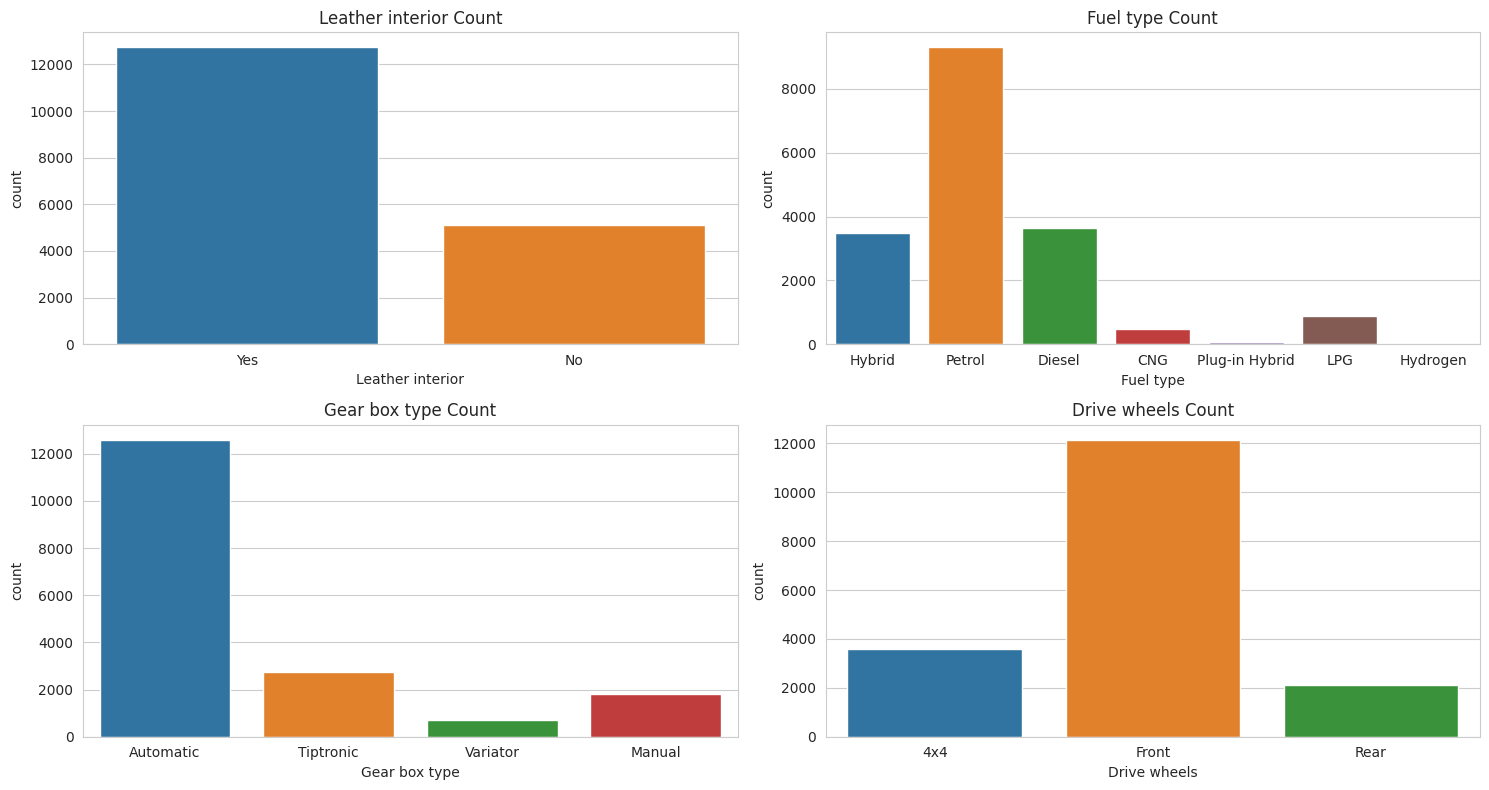

In [ ]:
cat_col = ('Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels')
plt.figure(figsize=(15, 8))
for i, col in enumerate(cat_col, 1):
    plt.subplot(2, 2, i)
    if col == 'Profession':
        sns.countplot(data=df, x=col, hue=col)
        plt.xticks(rotation=45)
    else:
        sns.countplot(data=df, x=col, hue=col)
    plt.title(f'{col} Count')

plt.tight_layout()
plt.show()

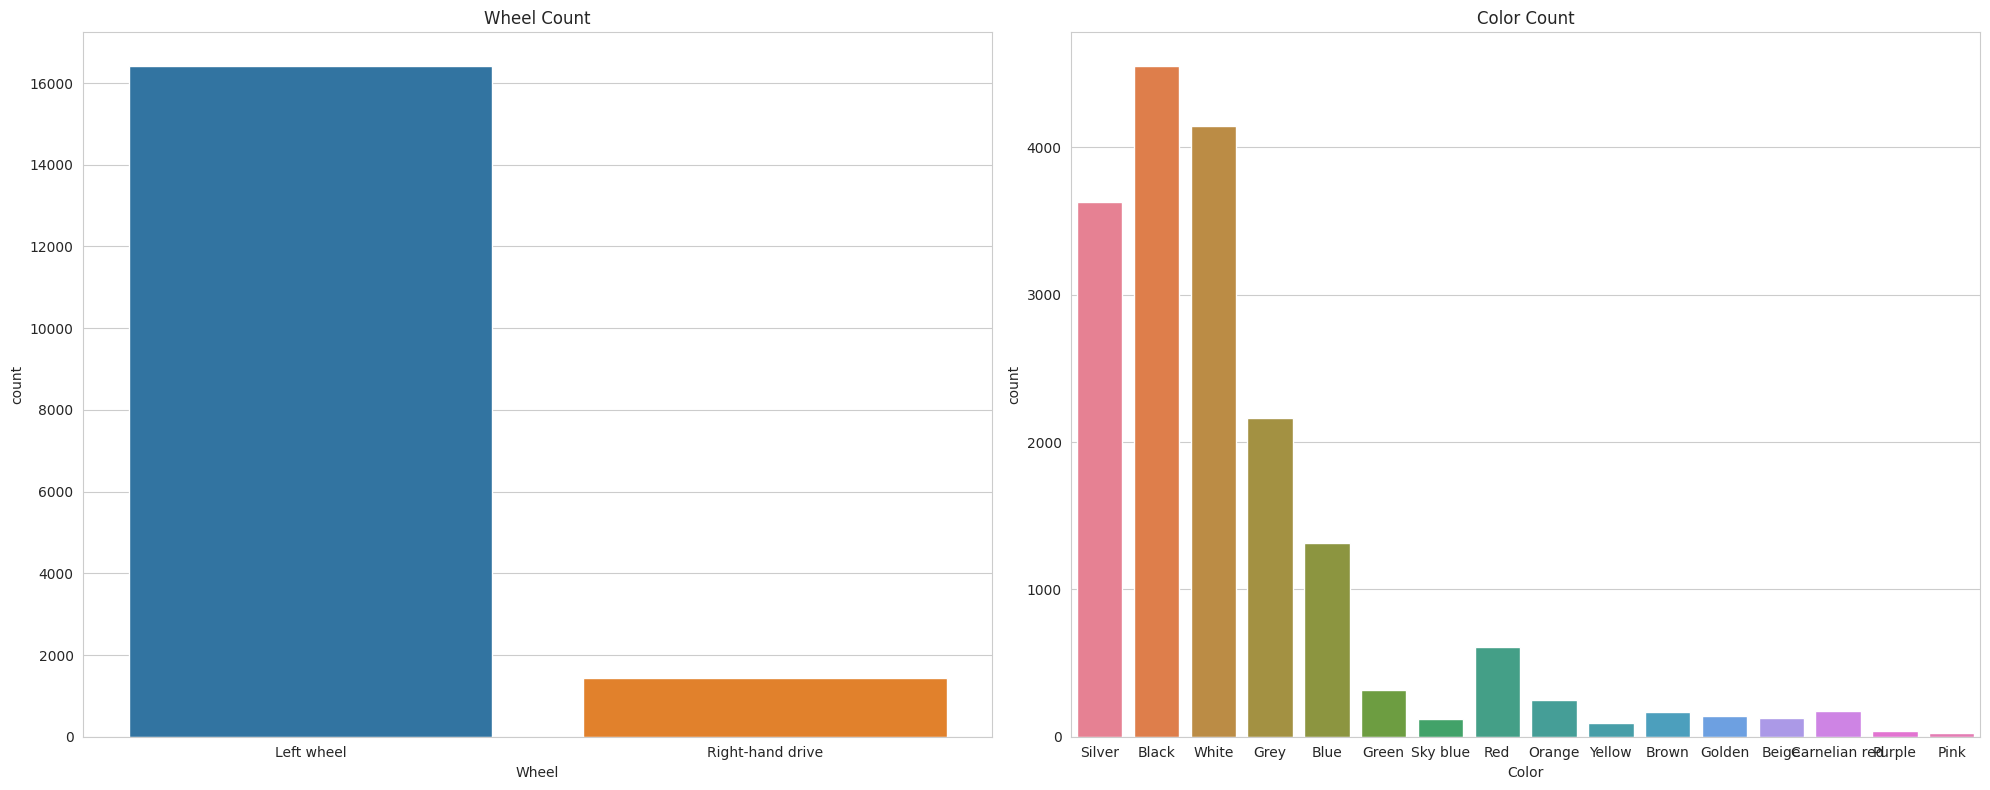

In [ ]:
cat_col = ('Wheel', 'Color')
plt.figure(figsize=(20, 8))
for i, col in enumerate(cat_col, 1):
    plt.subplot(1, 2, i)
    if col == 'Profession':
        sns.countplot(data=df, x=col, hue=col)
        plt.xticks(rotation=45)
    else:
        sns.countplot(data=df, x=col, hue=col)
    plt.title(f'{col} Count')

plt.tight_layout()
plt.show()

# **Data Preprocessing**

In [ ]:
df_cp = df.drop(columns=['ID', 'Price']).copy()

In [ ]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17869 entries, 0 to 19236
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Levy              17869 non-null  float64
 1   Manufacturer      17869 non-null  object 
 2   Model             17869 non-null  object 
 3   Prod. year        17869 non-null  int64  
 4   Category          17869 non-null  object 
 5   Leather interior  17869 non-null  object 
 6   Fuel type         17869 non-null  object 
 7   Engine volume     17869 non-null  float64
 8   Mileage           17869 non-null  int64  
 9   Cylinders         17869 non-null  int64  
 10  Gear box type     17869 non-null  object 
 11  Drive wheels      17869 non-null  object 
 12  Wheel             17869 non-null  object 
 13  Color             17869 non-null  object 
 14  Airbags           17869 non-null  int64  
dtypes: float64(2), int64(4), object(9)
memory usage: 2.2+ MB


In [ ]:
df.select_dtypes(include=['object']).columns

Index(['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type',
       'Gear box type', 'Drive wheels', 'Wheel', 'Color'],
      dtype='object')

## Feature Transformation

In [ ]:
from sklearn.preprocessing import PowerTransformer

# close the range between the data using log function
def apply_log(column):
    return np.log(column+1)

def normality_test(column):
    return stats.normaltest(column)

In [ ]:
def trans_result(data, column):
  # PowerTransform data
  feature = data[column].to_numpy().reshape(-1,1)

  powtr = PowerTransformer()
  feature_transf = powtr.fit_transform(feature)
  array_1d = feature_transf.flatten()
  feature = pd.Series(data=array_1d, index=list(range(len(array_1d))))

  # Log Transform data
  log_transformed = apply_log(data[column])

  # Create axis for original data plot (ax1) and transformed data (ax2)
  fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,3))

  # Plot original data & get metrics
  data[column].plot(kind='hist', ax=ax1)
  ax1.title.set_text('Original data')
  norm_test1 = normality_test(data[column])

  # Plot log transformed data & get metrics
  log_transformed.plot(kind='hist', ax=ax2);
  ax2.title.set_text('Log Transformed data')
  norm_test2 = normality_test(log_transformed)

  # Plot power transformed data & get metrics
  feature.plot(kind='hist', ax=ax3);
  ax3.title.set_text('PowerTransformed data')
  norm_test3 = normality_test(feature)

  # Create a DataFrame that shows normality test results for each tranformation
  norm_results = [norm_test1, norm_test2, norm_test3]
  metrics = pd.DataFrame(norm_results, index=['Original data', 'Log transform', 'PowerTransformer'])
  return log_transformed, metrics

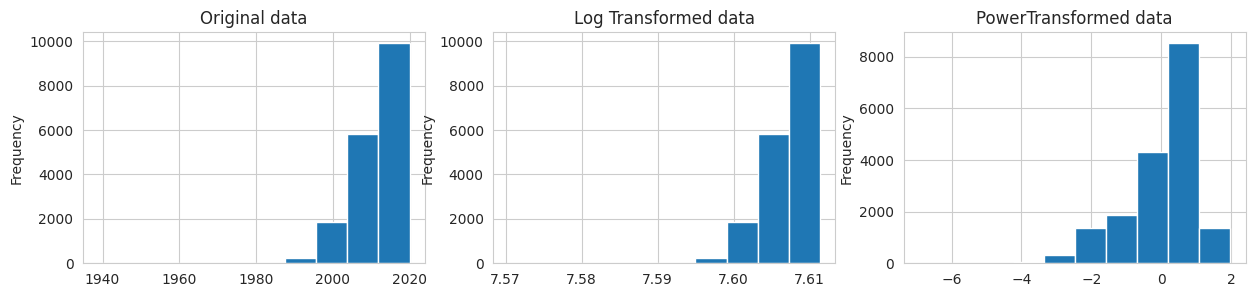

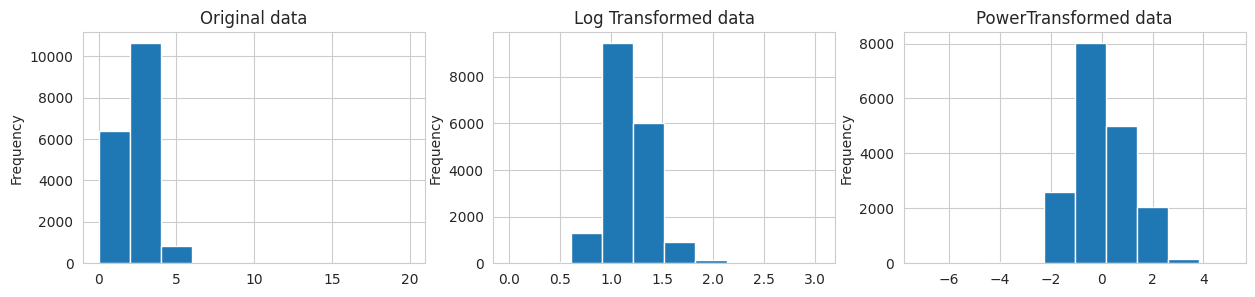

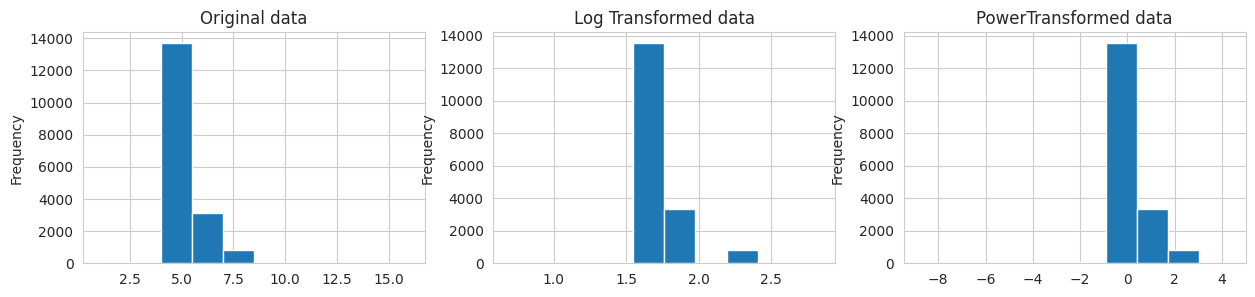

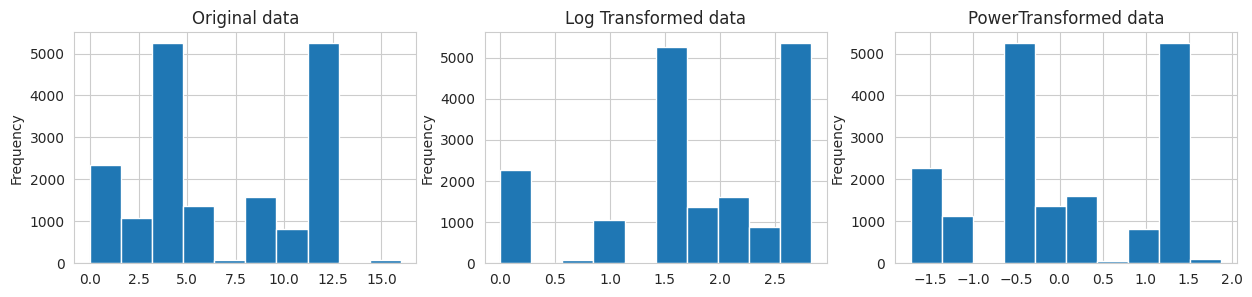

In [ ]:
# we use log transform to transform the data
for col in num_col:
  df_cp[col], _ = trans_result(df_cp, col)
# df_cp['Age'], _ = trans_result(df_cp, 'Age')

## Label Encode Binary data

In [ ]:
columns = ('Leather interior', 'Fuel type',
       'Gear box type', 'Drive wheels', 'Wheel', 'Model')

le_encoder = {} # buat nyimpen objek encoder untuk kolom-kolom yg di-encode

for col in columns:
  le_for_each_column = {}
  lbl = LabelEncoder()
  lbl.fit(df_cp[col])
  df_cp[col] = lbl.transform(df_cp[col])
  for i in range(len(df[col].unique())):
    le_for_each_column[df[col].unique()[i]] = df_cp[col].unique()[i]
  le_encoder[col] = lbl
  print(le_for_each_column)


{'Yes': 1, 'No': 0}
{'Hybrid': 2, 'Petrol': 5, 'Diesel': 1, 'CNG': 0, 'Plug-in Hybrid': 6, 'LPG': 4, 'Hydrogen': 3}
{'Automatic': 0, 'Tiptronic': 2, 'Variator': 3, 'Manual': 1}
{'4x4': 0, 'Front': 1, 'Rear': 2}
{'Left wheel': 0, 'Right-hand drive': 1}
{'RX 450': 1176, 'Equinox': 630, 'FIT': 655, 'Escape': 633, 'Santa FE': 1229, 'Prius': 1093, 'Sonata': 1257, 'Camry': 412, 'RX 350': 1170, 'E 350': 574, 'Transit': 1342, 'Vectra': 1376, 'CHR': 355, 'Elantra': 605, 'RX 400': 1171, 'E 220': 548, 'GX 470': 757, 'Highlander': 800, 'Vito': 1404, 'Cayenne': 442, 'X5': 1447, 'Grand Cherokee': 779, 'H1': 787, 'Jetta': 846, 'Tacoma': 1321, 'Prius C': 1101, 'Aqua': 244, 'Escape Hybrid': 636, 'Civic': 458, 'Q7': 1135, 'Megane 1.5CDI': 977, 'E 300': 568, 'Q5': 1131, 'C 180': 298, 'Juke': 865, '535': 155, 'Cruze LT': 515, 'Fusion': 712, 'VOXY': 1372, 'A 160': 195, 'Tucson': 1363, 'Vitz': 1415, 'Captiva': 433, 'Mustang': 998, 'ML 350': 938, 'Yaris': 1480, 'Cr-v': 501, 'Cruze': 511, 'Orlando': 1033, '52

In [ ]:
# Simpan model encoder ke dalam file pickle
with open('le_encoder.pkl', 'wb') as f:
    pickle.dump(le_encoder, f)

## LeaveOneOutEncoder

In [ ]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17869 entries, 0 to 19236
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Levy              17869 non-null  float64
 1   Manufacturer      17869 non-null  object 
 2   Model             17869 non-null  int64  
 3   Prod. year        17869 non-null  float64
 4   Category          17869 non-null  object 
 5   Leather interior  17869 non-null  int64  
 6   Fuel type         17869 non-null  int64  
 7   Engine volume     17869 non-null  float64
 8   Mileage           17869 non-null  int64  
 9   Cylinders         17869 non-null  float64
 10  Gear box type     17869 non-null  int64  
 11  Drive wheels      17869 non-null  int64  
 12  Wheel             17869 non-null  int64  
 13  Color             17869 non-null  object 
 14  Airbags           17869 non-null  float64
dtypes: float64(5), int64(7), object(3)
memory usage: 2.2+ MB


In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.7 MB/s eta 0:00:00


In [ ]:
# from category_encoders import LeaveOneOutEncoder

# # Initialize the LeaveOneOutEncoder
# loo_encoder = LeaveOneOutEncoder()

# # Fit and transform the entire DataFrame
# df_encoded = loo_encoder.fit_transform(df_cp, df['Price'])

# # Simpan model encoder ke dalam file pickle
# with open('leave_one_out_encoder.pkl', 'wb') as f:
#     pickle.dump(loo_encoder, f)

In [ ]:
# # # Select the columns to be encoded
# columns_to_encode = ('Model', 'Category')

# for column in columns_to_encode:
#   df_cp[column] = df_encoded[column]


In [ ]:
df_cp.head()

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,1399.000000,LEXUS,1176,7.606387,Jeep,1,2,1.504077,186005,1.945910,0,0,0,Silver,2.564949
1,1018.000000,CHEVROLET,630,7.606885,Jeep,0,5,1.386294,192000,1.945910,2,0,0,Black,2.197225
2,906.299205,HONDA,655,7.604396,Hatchback,0,5,0.832909,200000,1.609438,3,1,1,Black,1.098612
3,862.000000,FORD,633,7.606885,Jeep,1,2,1.252763,168966,1.609438,0,0,0,White,0.000000
4,446.000000,HONDA,655,7.608374,Hatchback,1,5,0.832909,91901,1.609438,0,1,0,Silver,1.609438


## Encode Categorical Data

In [ ]:
# convert rest of categorical variable into dummy variable

df_cp = pd.get_dummies(df_cp, drop_first=True) # One-Hot Encoding

In [ ]:
df_cp

,Levy,Model,Prod. year,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Airbags,Manufacturer_ALFA ROMEO,Manufacturer_AUDI,Manufacturer_BMW,Manufacturer_BUICK,Manufacturer_CADILLAC,Manufacturer_CHEVROLET,Manufacturer_CHRYSLER,Manufacturer_CITROEN,Manufacturer_DAEWOO,Manufacturer_DAIHATSU,Manufacturer_DODGE,Manufacturer_FERRARI,Manufacturer_FIAT,Manufacturer_FORD,Manufacturer_GAZ,Manufacturer_GMC,Manufacturer_GREATWALL,Manufacturer_HAVAL,Manufacturer_HONDA,Manufacturer_HUMMER,Manufacturer_HYUNDAI,Manufacturer_INFINITI,Manufacturer_ISUZU,Manufacturer_JAGUAR,Manufacturer_JEEP,Manufacturer_KIA,Manufacturer_LANCIA,Manufacturer_LAND ROVER,Manufacturer_LEXUS,Manufacturer_LINCOLN,Manufacturer_MASERATI,Manufacturer_MAZDA,Manufacturer_MERCEDES-BENZ,Manufacturer_MERCURY,Manufacturer_MINI,Manufacturer_MITSUBISHI,Manufacturer_MOSKVICH,Manufacturer_NISSAN,Manufacturer_OPEL,Manufacturer_PEUGEOT,Manufacturer_PONTIAC,Manufacturer_PORSCHE,Manufacturer_RENAULT,Manufacturer_ROLLS-ROYCE,Manufacturer_ROVER,Manufacturer_SAAB,Manufacturer_SATURN,Manufacturer_SCION,Manufacturer_SEAT,Manufacturer_SKODA,Manufacturer_SSANGYONG,Manufacturer_SUBARU,Manufacturer_SUZUKI,Manufacturer_TOYOTA,Manufacturer_UAZ,Manufacturer_VAZ,Manufacturer_VOLKSWAGEN,Manufacturer_VOLVO,Manufacturer_ZAZ,Manufacturer_სხვა,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,Color_Black,Color_Blue,Color_Brown,Color_Carnelian red,Color_Golden,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,1399.000000,1176,7.606387,1,2,1.504077,186005,1.945910,0,0,0,2.564949,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,1018.000000,630,7.606885,0,5,1.386294,192000,1.945910,2,0,0,2.197225,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,906.299205,655,7.604396,0,5,0.832909,200000,1.609438,3,1,1,1.098612,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,862.000000,633,7.606885,1,2,1.252763,168966,1.609438,0,0,0,0.000000,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,

In [ ]:
one_hot_columns = df_cp.columns # save the column after using one-hot encoding to be used later.
one_hot_columns

Index(['Levy', 'Model', 'Prod. year', 'Leather interior', 'Fuel type',
       'Engine volume', 'Mileage', 'Cylinders', 'Gear box type',
       'Drive wheels', 'Wheel', 'Airbags', 'Manufacturer_ALFA ROMEO',
       'Manufacturer_AUDI', 'Manufacturer_BMW', 'Manufacturer_BUICK',
       'Manufacturer_CADILLAC', 'Manufacturer_CHEVROLET',
       'Manufacturer_CHRYSLER', 'Manufacturer_CITROEN', 'Manufacturer_DAEWOO',
       'Manufacturer_DAIHATSU', 'Manufacturer_DODGE', 'Manufacturer_FERRARI',
       'Manufacturer_FIAT', 'Manufacturer_FORD', 'Manufacturer_GAZ',
       'Manufacturer_GMC', 'Manufacturer_GREATWALL', 'Manufacturer_HAVAL',
       'Manufacturer_HONDA', 'Manufacturer_HUMMER', 'Manufacturer_HYUNDAI',
       'Manufacturer_INFINITI', 'Manufacturer_ISUZU', 'Manufacturer_JAGUAR',
       'Manufacturer_JEEP', 'Manufacturer_KIA', 'Manufacturer_LANCIA',
       'Manufacturer_LAND ROVER', 'Manufacturer_LEXUS', 'Manufacturer_LINCOLN',
       'Manufacturer_MASERATI', 'Manufacturer_MAZDA',
       

# **Feature Scaling**

In [ ]:
df_tmp = df_cp.copy()

In [ ]:
y = df['Price'].values
X = df_tmp

In [ ]:
# Save the X column for predicting new values in the machine learning prediction section
x_col = X.columns
X.columns

Index(['Levy', 'Model', 'Prod. year', 'Leather interior', 'Fuel type',
       'Engine volume', 'Mileage', 'Cylinders', 'Gear box type',
       'Drive wheels', 'Wheel', 'Airbags', 'Manufacturer_ALFA ROMEO',
       'Manufacturer_AUDI', 'Manufacturer_BMW', 'Manufacturer_BUICK',
       'Manufacturer_CADILLAC', 'Manufacturer_CHEVROLET',
       'Manufacturer_CHRYSLER', 'Manufacturer_CITROEN', 'Manufacturer_DAEWOO',
       'Manufacturer_DAIHATSU', 'Manufacturer_DODGE', 'Manufacturer_FERRARI',
       'Manufacturer_FIAT', 'Manufacturer_FORD', 'Manufacturer_GAZ',
       'Manufacturer_GMC', 'Manufacturer_GREATWALL', 'Manufacturer_HAVAL',
       'Manufacturer_HONDA', 'Manufacturer_HUMMER', 'Manufacturer_HYUNDAI',
       'Manufacturer_INFINITI', 'Manufacturer_ISUZU', 'Manufacturer_JAGUAR',
       'Manufacturer_JEEP', 'Manufacturer_KIA', 'Manufacturer_LANCIA',
       'Manufacturer_LAND ROVER', 'Manufacturer_LEXUS', 'Manufacturer_LINCOLN',
       'Manufacturer_MASERATI', 'Manufacturer_MAZDA',
       

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
sc_X = StandardScaler()
pickle.dump(sc_X.fit(X), open(f'scaler.pkl', 'wb'))
X = sc_X.fit_transform(X)

# Split Data Train and Data Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test

(array([[-0.66301979,  0.90442147,  0.41672411, ..., -0.08256918,
         -0.54939597, -0.07349457],
        [-0.95152724, -0.53021359,  0.59391174, ..., -0.08256918,
         -0.54939597, -0.07349457],
        [ 0.99074609, -0.97402156, -0.64825274, ..., -0.08256918,
          1.82018081, -0.07349457],
        ...,
        [ 0.02295613, -0.29798849, -1.36000666, ..., -0.08256918,
         -0.54939597, -0.07349457],
        [-0.53422183,  0.36772346,  0.94802335, ..., -0.08256918,
          1.82018081, -0.07349457],
        [ 0.02295613, -0.08124507,  0.06208476, ..., -0.08256918,
         -0.54939597, -0.07349457]]),
 array([[-0.016454  ,  0.01164497,  0.94802335, ..., -0.08256918,
          1.82018081, -0.07349457],
        [ 1.92839528, -0.14059148,  0.77101145, ..., -0.08256918,
         -0.54939597, -0.07349457],
        [ 0.02295613, -1.43331121, -2.25169954, ..., -0.08256918,
          1.82018081, -0.07349457],
        ...,
        [ 0.02295613, -1.61651101, -0.82605821, ..., -

# **Machine Learning Model**

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBRegressor

## Model Evaluation

In [ ]:
# choose all the models that we want to use
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
svm = SVR(kernel='rbf')
knn = KNeighborsRegressor()
nb = GaussianNB()
xgb = XGBRegressor()

# save the models in array
models = [lr, dt, rf, knn, nb, xgb]

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# evaluate the model using r2_score and mean squared error (mse) metrics
def evaluate_model(predictions, name):
    print('Model: ', name)

    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    print('Mean Squared Error:', mse)
    print('R^2 Score:', r2)

In [ ]:
# save the predict value in variable 'preds' inside an array
preds = [[], [], [], [], [], []]

for i, model in enumerate(models):
    model.fit(X_train,y_train)
    preds[i] = model.predict(X_test)
preds

[array([11394.25, 15561.5 ,  2960.5 , ..., 10963.  ,  8036.  ,  8151.25]),
 array([ 7683.,  3206.,  8154., ...,  2274., 10976.,  3293.]),
 array([ 7745.80909091,  3124.72434428,  6320.47      , ...,
        20470.43      ,  7520.29      ,  3186.68      ]),
 array([ 5833.2,  4202.6,  5578.8, ..., 14581.2,  7495. ,  1034.6]),
 array([36692, 34811,  6269, ..., 43592, 32615,    31]),
 array([ 6913.9126 ,  4050.6482 ,  5790.0806 , ..., 17699.266  ,
         8943.819  ,   887.65204], dtype=float32)]

## Model Training and Prediction

In [ ]:
# calculate r2_score and mse for each model
for i in range(len(preds)):
  evaluate_model(predictions = preds[i], name = str(models[i]).split('(')[0])

Model:  LinearRegression
Mean Squared Error: 1.3455964023254753e+35
R^2 Score: -1.0447872614293917e+27
Model:  DecisionTreeRegressor
Mean Squared Error: 57805005.176085435
R^2 Score: 0.551173494887021
Model:  RandomForestRegressor
Mean Squared Error: 32195530.8290467
R^2 Score: 0.7500180557334089
Model:  KNeighborsRegressor
Mean Squared Error: 63488055.570296586
R^2 Score: 0.50704749508744
Model:  GaussianNB
Mean Squared Error: 236481391.8273643
R^2 Score: -0.8361578948883102
Model:  XGBRegressor
Mean Squared Error: 34384433.351665914
R^2 Score: 0.7330223394235933


## The Best Model

In [ ]:
# choose the best model

rf = RandomForestRegressor()
rf.fit(X_train,y_train)
with open('model_rf.pkl', 'wb') as f:
    pickle.dump(rf, f)

## Predict

Apply the best model into some data example to evaluate the result

In [ ]:
df_predict = pd.DataFrame(df[df['Manufacturer'] == 'TOYOTA'].iloc[0]).T
df_predict['Price']

6    1803
Name: Price, dtype: object

In [ ]:
df_predict = df_predict.drop(columns=['ID', 'Price'])
df_predict

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
6,761.0,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909,4,Automatic,Front,Left wheel,White,12


In [ ]:
# we use log transform to transform the data
for col in num_col:
  df_predict[col] = df_predict[col].apply(lambda x: apply_log(x))

In [ ]:
le_count = 0
for col in df_predict.columns:
    if col in le_encoder:
        print(col)
        df_predict[col] = le_encoder[col].transform(df_predict[col])
        le_count += 1
print('{} columns were label encoded.'.format(le_count))

Model
Leather interior
Fuel type
Gear box type
Drive wheels
Wheel
6 columns were label encoded.


In [ ]:
df_predict

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
6,761.0,TOYOTA,1093,7.606387,Hatchback,1,2,1.029619,258909,1.609438,0,1,0,White,2.564949


In [ ]:
df_predict

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
6,761.0,TOYOTA,1093,7.606387,Hatchback,1,2,1.029619,258909,1.609438,0,1,0,White,2.564949


In [ ]:
# Menambahkan kolom-kolom yang hilang pada data baru
for kolom in one_hot_columns:
    if kolom not in df_predict.columns:
        df_predict[kolom] = 0

In [ ]:
df_predict = df_predict[x_col]

In [ ]:
df_predict[x_col].columns

Index(['Levy', 'Model', 'Prod. year', 'Leather interior', 'Fuel type',
       'Engine volume', 'Mileage', 'Cylinders', 'Gear box type',
       'Drive wheels', 'Wheel', 'Airbags', 'Manufacturer_ALFA ROMEO',
       'Manufacturer_AUDI', 'Manufacturer_BMW', 'Manufacturer_BUICK',
       'Manufacturer_CADILLAC', 'Manufacturer_CHEVROLET',
       'Manufacturer_CHRYSLER', 'Manufacturer_CITROEN', 'Manufacturer_DAEWOO',
       'Manufacturer_DAIHATSU', 'Manufacturer_DODGE', 'Manufacturer_FERRARI',
       'Manufacturer_FIAT', 'Manufacturer_FORD', 'Manufacturer_GAZ',
       'Manufacturer_GMC', 'Manufacturer_GREATWALL', 'Manufacturer_HAVAL',
       'Manufacturer_HONDA', 'Manufacturer_HUMMER', 'Manufacturer_HYUNDAI',
       'Manufacturer_INFINITI', 'Manufacturer_ISUZU', 'Manufacturer_JAGUAR',
       'Manufacturer_JEEP', 'Manufacturer_KIA', 'Manufacturer_LANCIA',
       'Manufacturer_LAND ROVER', 'Manufacturer_LEXUS', 'Manufacturer_LINCOLN',
       'Manufacturer_MASERATI', 'Manufacturer_MAZDA',
       

In [ ]:
df_predict = pd.DataFrame(sc_X.transform(df_predict.iloc[0].values.reshape(1,-1)))

In [ ]:
y_pred = rf.predict(df_predict)
y_pred

array([1796.49])